<a href="https://colab.research.google.com/github/ryangprince/TensorFlow-Bootcamp/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks & Computer Vision with TensorFlow

What is a convolutional neural network?

Architecture of a CNN:
* **Input image(s)**: Target images you'd like to discover patterns in
 * Typical values: Whatever you can take a photo (or video) of
* **Input layer**: Takes in target images and preprocesses them for further layers
 * Typical values: `input_shape = [batch_size, image_height, image_width, color_channels]`
* **Convolution layer**: Extracts/learns the most important features from target images
 * Typical values: Multiple, can create with `tf.keras.layers.ConvXD` (X can be multiple values)
* **Hidden activation**: Adds non-linearity to learned features (non-straight lines)
 * Typical values: Usually ReLU (`tf.keras.activations.relu`)
* **Pooling layer**: Reduces the dimensionality of learned image features
 * Typical values: Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`)
 > So a **convolution layer** learns the most important features, and then a **pooling layer** learns the most important features out of the already learned important features from a convolution layer.
 > This layer dramatically reduces the number of calculations a CNN has to make,making it much more computationally efficient.
* **Fully connected layer**: Further refines learned features from convolution layers
 * Typical values: `tf.keras.layers.Dense`
* **Output layer**: Takes learned features and outputs them in shape of target label
 * Typical values: `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak, or sushi)
> The **fully connected layer** is often the **output layer**
* **Output activation**: Adds non-linearities to ouput layer
 * Typical values: `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax`
 > Again, this adds non-linearities to the ouput layer

**Note:** there are almost an unlimited amount of ways you could stack together a convolutional neural network, this slide demonstrates only one.

Side note on inputs and outputs:
* Input will be numberically encoded RGG values between 0 and 255.
* Output will be a single value between 0 and 1 if it's binary classification, or a set of integers it its multi-class classification.

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-15 22:04:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 142.251.188.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   156MB/s    in 0.7s    

2025-02-15 22:04:43 (156 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
# List the files in pizza_steak
!ls pizza_steak

test  train


In [ ]:
# List the files in pizza_steak/train/
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# In video there was an extra .DS_Store file in the pizza_stake/test and pizza_steak/train folders, but non in my version
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 15 22:04 .
drwxr-xr-x 1 root root 4096 Feb 15 22:04 ..
drwxr-xr-x 4 root root 4096 Feb 15 22:04 test
drwxr-xr-x 4 root root 4096 Feb 15 22:04 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the iage and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3644733.jpg']
Image shape: (512, 512, 3)


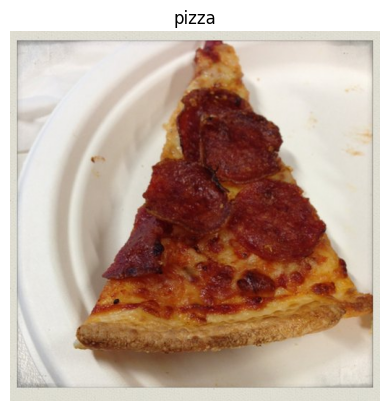

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train',
                        target_class='pizza')

In [ ]:
import tensorflow as tf
tensor = tf.constant(img)

In [ ]:
tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[223, 221, 209],
        [224, 222, 210],
        [225, 223, 211],
        ...,
        [229, 227, 215],
        [227, 225, 213],
        [222, 220, 208]],

       [[223, 221, 209],
        [223, 221, 209],
        [224, 222, 210],
        ...,
        [226, 224, 212],
        [226, 224, 212],
        [224, 222, 210]],

       [[223, 221, 209],
        [224, 222, 210],
        [224, 222, 210],
        ...,
        [222, 220, 208],
        [224, 222, 210],
        [223, 221, 209]],

       ...,

       [[220, 220, 208],
        [219, 219, 207],
        [218, 218, 206],
        ...,
        [221, 219, 207],
        [223, 221, 209],
        [221, 219, 207]],

       [[221, 221, 209],
        [220, 220, 208],
        [220, 220, 208],
        ...,
        [223, 221, 209],
        [225, 223, 211],
        [223, 221, 209]],

       [[222, 222, 210],
        [222, 222, 210],
        [222, 222, 210],
        ...,
        [221, 219, 20

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks, prefer the values they work with to be between 0 and 1. Knowing this, one of the most commond proprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        [0.88235294, 0.8745098 , 0.82745098],
        ...,
        [0.89803922, 0.89019608, 0.84313725],
        [0.89019608, 0.88235294, 0.83529412],
        [0.87058824, 0.8627451 , 0.81568627]],

       [[0.8745098 , 0.86666667, 0.81960784],
        [0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        ...,
        [0.88627451, 0.87843137, 0.83137255],
        [0.88627451, 0.87843137, 0.83137255],
        [0.87843137, 0.87058824, 0.82352941]],

       [[0.8745098 , 0.86666667, 0.81960784],
        [0.87843137, 0.87058824, 0.82352941],
        [0.87843137, 0.87058824, 0.82352941],
        ...,
        [0.87058824, 0.8627451 , 0.81568627],
        [0.87843137, 0.87058824, 0.82352941],
        [0.8745098 , 0.86666667, 0.81960784]],

       ...,

       [[0.8627451 , 0.8627451 , 0.81568627],
        [0.85882353, 0.85882353, 0.81176471],
        [0.85490196, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build our CNN to find patterns in our images
* Compile our CNN
* Fit our CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step - accuracy: 0.5629 - loss: 0.6725 - val_accuracy: 0.8120 - val_loss: 0.4470
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8030 - loss: 0.4332 - val_accuracy: 0.8740 - val_loss: 0.3788
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.8368 - loss: 0.3893 - val_accuracy: 0.8660 - val_loss: 0.3530
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8613 - loss: 0.3589 - val_accuracy: 0.8040 - val_loss: 0.4430
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.8511 - loss: 0.3254 - val_accuracy: 0.8080 - val_loss: 0.3953


**Note:** `len(train_data)` = 47 because we have 1500 train examples and 32 batches (1500/32 = ~47). So now we have 47 batches of 32 images and their labels.

The reason we put things into batches is that way it can all fit into memory of our computer chip. If we splice the data into batches, it let's the computer find patterns in the first 32 images, then another 32 images, etc.

🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in a lots of cases, it is. The difference here is the two different styles of models we're using. A series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, versus **a convolutional neural network, that seeks to sort out and learn the most important patterns**, in this case in an image. So even though there are less learnable parameters in our convolutional neural network, these patterns are often more helpful in the deciphering between different **features** in an image than simply adding more neurons.

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

🛠 **Practice/exercise:** Go through the CNN explainer website for a minimum of 10 minutes and compare our neurla network with theirs: https://poloclub.github.io/cnn-explainer/

## Use the same model as before

See what happens if we try using the model we built during the classification module that had two dense layers with 4 neurons each. We build it using the TensorFlow playground.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.4899 - loss: 1.4255 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.4931 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5150 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.4782 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.5230 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Creat the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.5841 - loss: 5.9450 - val_accuracy: 0.6800 - val_loss: 0.8654
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.6385 - loss: 1.2486 - val_accuracy: 0.7060 - val_loss: 0.5892
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6888 - loss: 0.7596 - val_accuracy: 0.5880 - val_loss: 1.1379
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.6713 - loss: 0.8830 - val_accuracy: 0.6800 - val_loss: 0.8347
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6974 - loss: 0.8878 - val_accuracy: 0.7780 - val_loss: 0.4497


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/ normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiement, experiment, experiment)

### 1. Become one with the data

['296268.jpg']
Image shape: (512, 382, 3)
['2382016.jpg']
Image shape: (512, 512, 3)


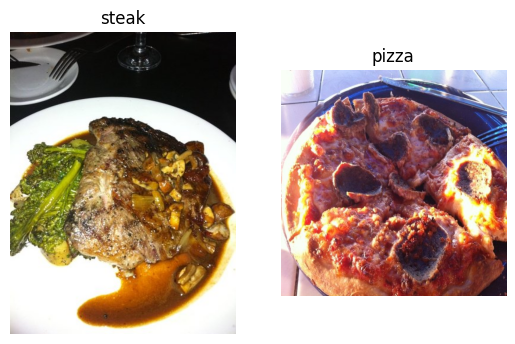

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2a. DEPRECATED Preprocess the data (prepare it for a model)

In [ ]:
# Define our directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset that a model looks at during training. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://x.com/ylecun/status/989610208497360896?lang=en&mx=2

"*The best performance has been consistently obtained for mini-batch sizes between m=2 and m=32*": https://arxiv.org/abs/1804.07612

In [ ]:
# Create train and test data generators and rescale the data

# ImageDataGenerator has been DEPRECATED: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# Following along with video but will redo this in up-to-date version below
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode='binary', # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a training data batch
# images, labels = train_data.next() # get the "next" batch of images/labels in train_data (DOESN'T WORK)
images, labels = train_data[0][0], train_data[0][1]
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
# Get the first two images
train_data[0][0][2], train_data[0][0].shape

(array([[[0.27450982, 0.29411766, 0.1764706 ],
         [0.27450982, 0.29411766, 0.1764706 ],
         [0.27058825, 0.29803923, 0.1764706 ],
         ...,
         [0.08627451, 0.0509804 , 0.01568628],
         [0.07843138, 0.04313726, 0.01568628],
         [0.07843138, 0.04313726, 0.02352941]],
 
        [[0.27450982, 0.29411766, 0.16862746],
         [0.28235295, 0.3019608 , 0.1764706 ],
         [0.27450982, 0.3019608 , 0.17254902],
         ...,
         [0.07843138, 0.04313726, 0.00784314],
         [0.07058824, 0.03529412, 0.00784314],
         [0.07058824, 0.03529412, 0.01568628]],
 
        [[0.28235295, 0.30980393, 0.18039216],
         [0.2784314 , 0.30588236, 0.1764706 ],
         [0.28235295, 0.30980393, 0.18039216],
         ...,
         [0.08627451, 0.0509804 , 0.01568628],
         [0.07843138, 0.04313726, 0.01568628],
         [0.0627451 , 0.02745098, 0.00784314]],
 
        ...,
 
        [[0.10588236, 0.09019608, 0.05490196],
         [0.1137255 , 0.09411766, 0.07058

In [ ]:
# View the first batch
train_data[0][1]

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 2b. CURRENT Preprocess the data (prepare it for a model)

In [ ]:
# Create train and test data generators and rescale the data

# tf.keras.preprocessing.image_dataset_from_directory: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
train_data_1 = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         label_mode='binary',
                                                         batch_size=32,
                                                         image_size=(224, 224))

test_data_1 = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        label_mode='binary',
                                                        batch_size=32,
                                                        image_size=(224, 224))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


`tf.keras.utils.image_dataset_from_directory()` returns a `tf.data.Data` object. So there are some additional steps required when preparing the data.

In [ ]:
# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply nromalization to datasets
train_data_1 = train_data_1.map(lambda x, y: (normalization_layer(x), y))
test_data_1 = test_data_1.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
len(train_data_1), len(test_data_1)

(47, 16)

In [ ]:
for image, labels in train_data_1.take(1):
  print(image)
  print(labels)
  break

tf.Tensor(
[[[[0.11764707 0.09411766 0.09411766]
   [0.13148886 0.10795944 0.10795944]
   [0.14425896 0.12156989 0.1310937 ]
   ...
   [0.02545638 0.04338372 0.05991025]
   [0.02481366 0.0444215  0.06010778]
   [0.02352941 0.04313726 0.05882353]]

  [[0.12194254 0.09841312 0.09841312]
   [0.12935926 0.10582983 0.11367297]
   [0.13720614 0.11451707 0.12404087]
   ...
   [0.03150261 0.04326732 0.06287516]
   [0.03131998 0.05092782 0.06661411]
   [0.02605028 0.04565813 0.0613444 ]]

  [[0.13207409 0.10854468 0.11453208]
   [0.13626076 0.11273135 0.12057449]
   [0.13940828 0.11671919 0.12624301]
   ...
   [0.03126136 0.04302607 0.06263392]
   [0.03522783 0.04884828 0.06752826]
   [0.02904398 0.04865183 0.0643381 ]]

  ...

  [[0.60480744 0.4848188  0.30733228]
   [0.57601136 0.45893505 0.28648195]
   [0.5942872  0.4773584  0.30699867]
   ...
   [0.31744823 0.1841149  0.07759113]
   [0.2877177  0.15438439 0.04850202]
   [0.2878165  0.15448315 0.04860079]]

  [[0.35755742 0.2740507  0.150515

### 3. Create a CNN model (start with baseline)

A baseline is a relatively simple model or existing result that you set up when beginning a machine learning experiment, and then as you keep experimenting, you try to beat the baseline.

🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [ ]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows (and neurons) going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding='valid', # if "same", output shape is same as input shape, if "valid" output shape gets compressed.
           activation='relu',
           input_shape=(224, 224, 3)), # input layer
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

**Breakdown of Conv2D layer**

Example code: `tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), padding='same')`

Example code (same as above): `tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='same')`

Hyperparameters:
* **Filters**: Decides how many filters should pass over an input tensor (e.g. sliding windows over an image).
> Typical values: 10, 32, 64, 128 (higher values lead to more complex models)
* **Kernel size** (also called filter size): Determines the shape of the filters (sliding windows) over the output.
> Typical values: 3, 5, 7 (lower values learn smaller features, higher values learn larger features)
* **Padding**: Pads the target tensor with zeroes (if "same") to preserve the input shape. Or leaves in the target tensor as is (if "valid"),lowering output shape.
> Typical values: "same" or "valid"
* **Strides**: The number of steps a filter takes across an image at a time (e.g. if strides=1, a filter moves across an image 1 pixel at a time).
> 1 (default), 2

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data), # each epoch take 47 steps because we want it to go through all the batches
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.6119 - loss: 1.1724 - val_accuracy: 0.7780 - val_loss: 0.4911
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.7632 - loss: 0.5077 - val_accuracy: 0.7800 - val_loss: 0.4523
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8293 - loss: 0.3976 - val_accuracy: 0.7220 - val_loss: 0.5224
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9310 - loss: 0.2231 - val_accuracy: 0.6940 - val_loss: 0.6868
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.9517 - loss: 0.1217 - val_accuracy: 0.7500 - val_loss: 0.6309


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

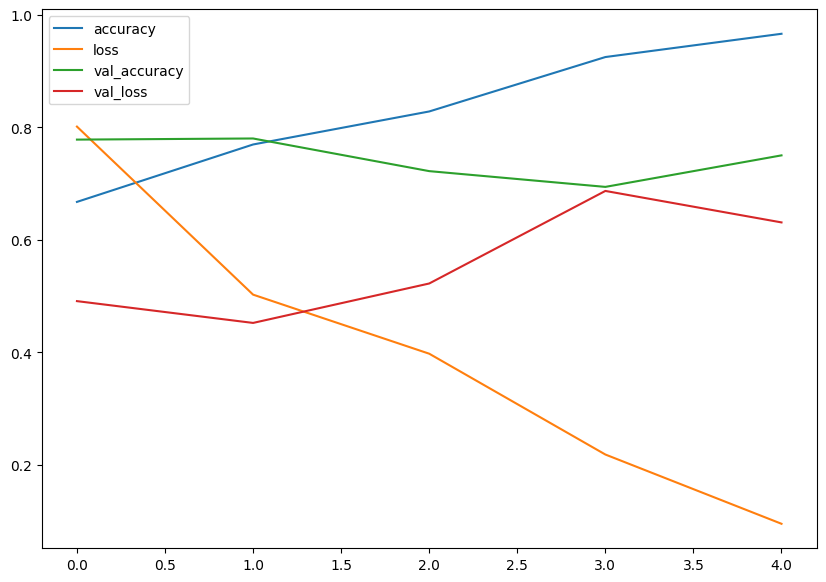

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

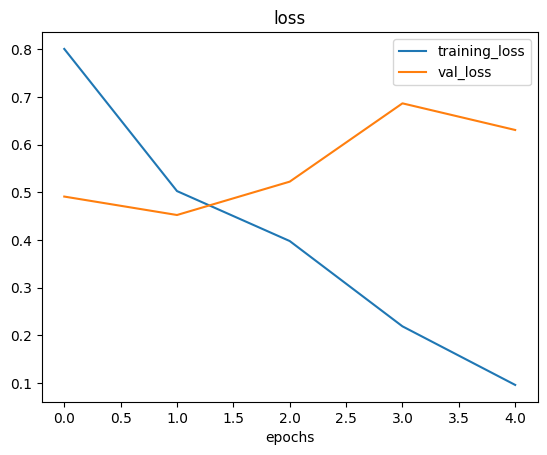

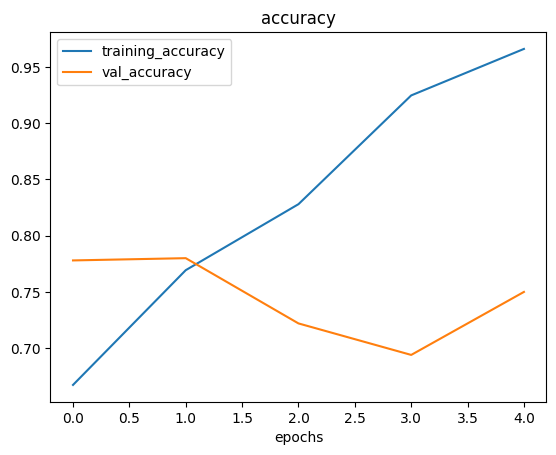

In [ ]:
# Check out the loss and acuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* add regularization layers (such as MaxPool2D)
* Add more data...

🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MaxPool2D is condensing the input to a smaller output. It finds the max value out of a set of features and passes along to the next layer only that feature.

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.6113 - loss: 0.6596 - val_accuracy: 0.7280 - val_loss: 0.5097
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7651 - loss: 0.5015 - val_accuracy: 0.8000 - val_loss: 0.4157
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7813 - loss: 0.4717 - val_accuracy: 0.8380 - val_loss: 0.3880
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8120 - loss: 0.4118 - val_accuracy: 0.8560 - val_loss: 0.3620
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.8279 - loss: 0.3935 - val_accuracy: 0.8540 - val_loss: 0.3418


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

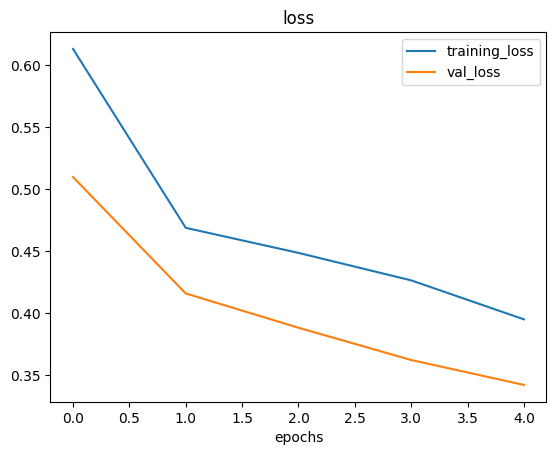

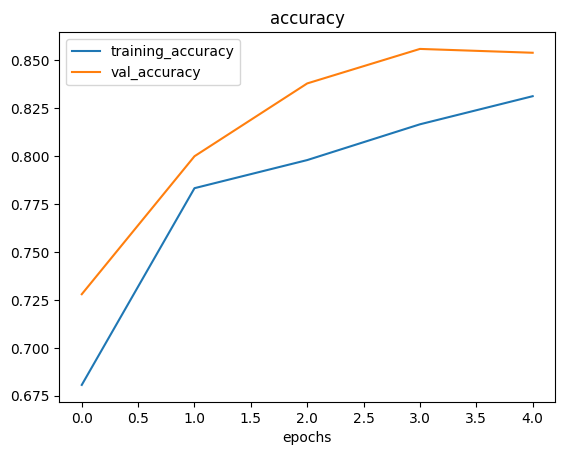

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, filpping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data[0][0], train_data[0][1]
augmented_images, augmented_labels = train_data_augmented[0][0], train_data_augmented[0][1]

showing image number: 24


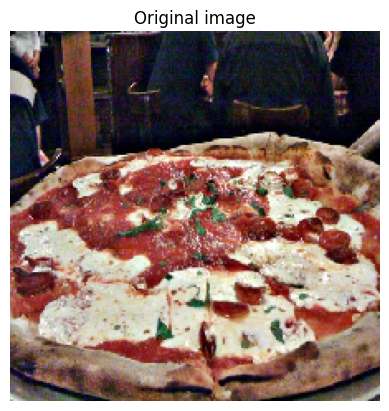

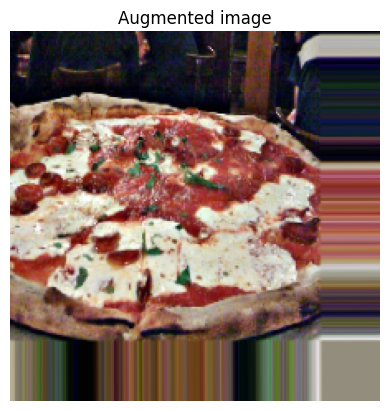

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # our batch sizes are 32...
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False);

### Train a model on augmented data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 440ms/step - accuracy: 0.4159 - loss: 0.7482 - val_accuracy: 0.4980 - val_loss: 0.6934
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 418ms/step - accuracy: 0.4708 - loss: 0.6930 - val_accuracy: 0.5040 - val_loss: 0.6881
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.5470 - loss: 0.6941 - val_accuracy: 0.6080 - val_loss: 0.6905
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 393ms/step - accuracy: 0.5666 - loss: 0.6902 - val_accuracy: 0.5680 - val_loss: 0.6839
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.5297 - loss: 0.6922 - val_accuracy: 0.7120 - val_loss: 0.6843


It takes longer to fit the augmented data because the training data itself doesn't change, and so the data is being augmented as the model is fitting the data, increasing the time it takes to train the model.

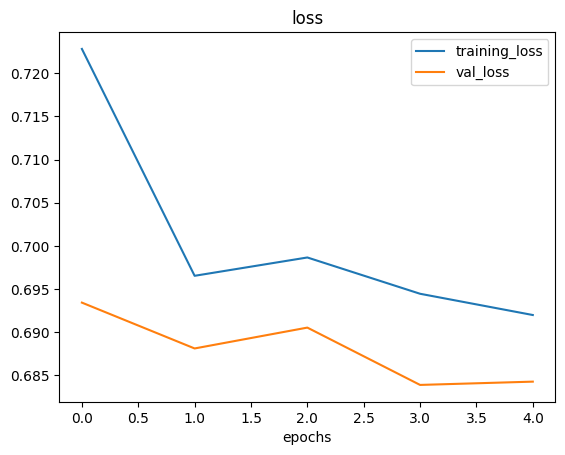

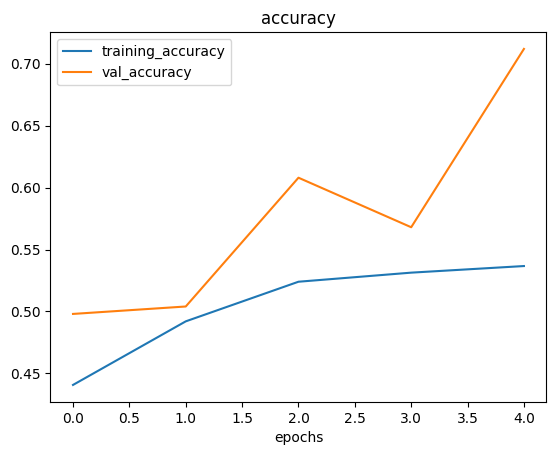

In [ ]:
# Check out model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 427ms/step - accuracy: 0.5334 - loss: 0.6964 - val_accuracy: 0.7700 - val_loss: 0.5383
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 393ms/step - accuracy: 0.7042 - loss: 0.5718 - val_accuracy: 0.7900 - val_loss: 0.4262
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.7616 - loss: 0.5249 - val_accuracy: 0.8480 - val_loss: 0.3985
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 393ms/step - accuracy: 0.7753 - loss: 0.4931 - val_accuracy: 0.8060 - val_loss: 0.4162
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 410ms/step - accuracy: 0.7491 - loss: 0.4965 - val_accuracy: 0.8100 - val_loss: 0.4131


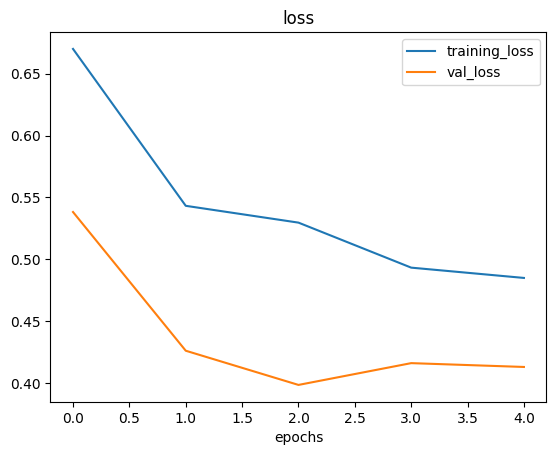

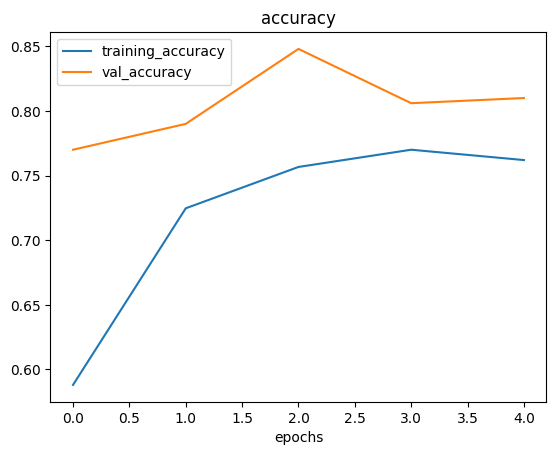

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

If we don't shuffle our data, the model is going to train on it sequentially, first learning all the patterns for pizza data, and then it is going to have to adjust those patterns to learn on the steak data.

But if we shuffle the training data it will look at random images of pizza and steak throughout every epoch, learning the patterns for both pizza and steak simultaneously. This means it doesn't have to do a backflip on itself during training.

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [ ]:
# Practice: recreate the CNN explainer model and fit it to the augmented data

# Set random seed
tf.random.set_seed(42)

# Create the model
practice_model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2,
              padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
practice_model_1.compile(loss='binary_crossentropy',
                         optimizer=Adam(),
                         metrics=['accuracy'])

# Fit the model
practice_history_1 = practice_model_1.fit(train_data_augmented_shuffled,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_augmented_shuffled),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 430ms/step - accuracy: 0.5679 - loss: 0.7453 - val_accuracy: 0.7460 - val_loss: 0.5138
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 403ms/step - accuracy: 0.7415 - loss: 0.5282 - val_accuracy: 0.7960 - val_loss: 0.4405
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 409ms/step - accuracy: 0.7503 - loss: 0.5071 - val_accuracy: 0.8640 - val_loss: 0.3557
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.7833 - loss: 0.4830 - val_accuracy: 0.8280 - val_loss: 0.3753
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 398ms/step - accuracy: 0.7964 - loss: 0.4426 - val_accuracy: 0.8620 - val_loss: 0.3338


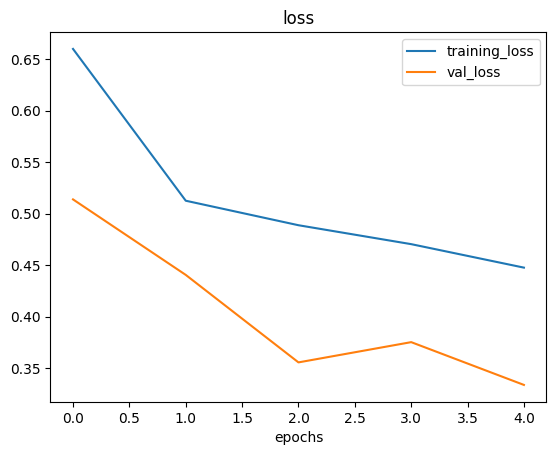

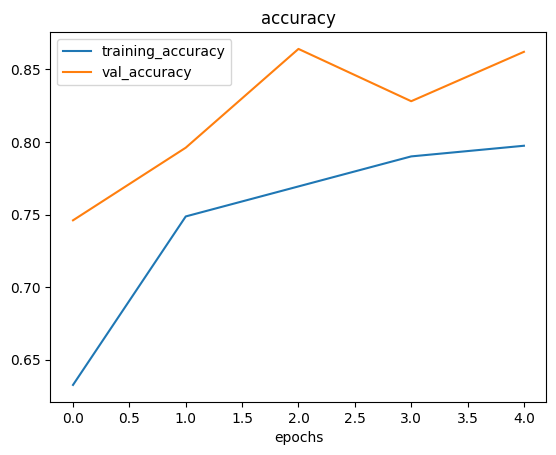

In [ ]:
# Plot the loss curves
plot_loss_curves(practice_history_1)

In [ ]:
# Practice: recreate the CNN explainer model and fit it to the augmented data
# Increase filters: 2 x Conv2D(filters=32) & 2 x Conv2D(filters=16)

# Set the random seed
tf.random.set_seed(42)

# Create the model
practice_model_2 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(16, 3, activation='relu'),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
practice_model_2.compile(loss='binary_crossentropy',
                         optimizer=Adam(),
                         metrics=['accuracy'])

# Fit the model
practice_history_2 = practice_model_2.fit(train_data_augmented_shuffled,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_augmented_shuffled),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 595ms/step - accuracy: 0.5352 - loss: 0.7210 - val_accuracy: 0.7620 - val_loss: 0.5386
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 478ms/step - accuracy: 0.7110 - loss: 0.5499 - val_accuracy: 0.8340 - val_loss: 0.4208
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 421ms/step - accuracy: 0.7383 - loss: 0.5157 - val_accuracy: 0.8580 - val_loss: 0.3640
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - accuracy: 0.7924 - loss: 0.4681 - val_accuracy: 0.8320 - val_loss: 0.4088
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 419ms/step - accuracy: 0.7821 - loss: 0.4877 - val_accuracy: 0.8620 - val_loss: 0.3380


In [ ]:
# Practice: recreate the CNN explainer model and fit it to the augmented data
# Add layers: 2 new Conv2d and one new MaxPool2D

# Set the random seed
tf.random.set_seed(42)

# Create the model
practice_model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
practice_model_3.compile(loss='binary_crossentropy',
                         optimizer=Adam(),
                         metrics=['accuracy'])

# Fit the model
practice_history_3 = practice_model_2.fit(train_data_augmented_shuffled,
                                          epochs=5,
                                          steps_per_epoch=len(train_data_augmented_shuffled),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 428ms/step - accuracy: 0.7888 - loss: 0.4961 - val_accuracy: 0.8540 - val_loss: 0.3672
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - accuracy: 0.7751 - loss: 0.4716 - val_accuracy: 0.8500 - val_loss: 0.3430
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - accuracy: 0.7656 - loss: 0.4861 - val_accuracy: 0.8640 - val_loss: 0.3251
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.7983 - loss: 0.4624 - val_accuracy: 0.8680 - val_loss: 0.3321
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 436ms/step - accuracy: 0.8132 - loss: 0.4360 - val_accuracy: 0.8480 - val_loss: 0.3515


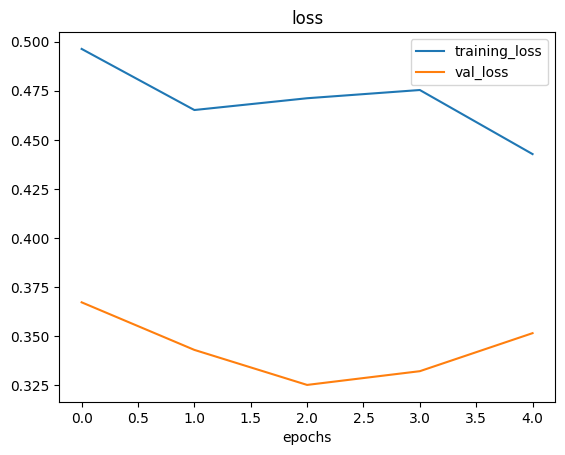

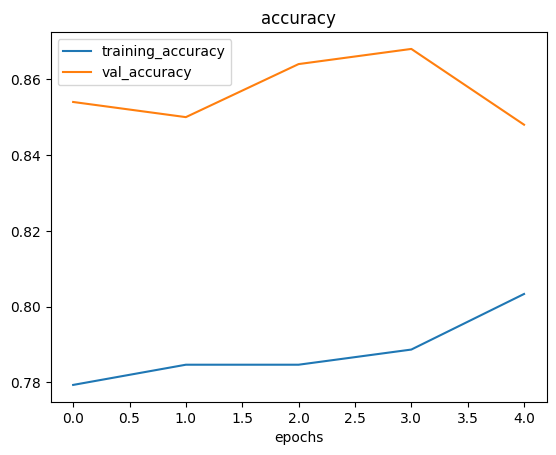

In [ ]:
# Plot the loss curves
plot_loss_curves(practice_history_3)

In [ ]:
# Practice: recreate the CNN explainer model and fit it to the augmented data
# Train for longer: increase from 5 to 10 epochs

# Set the random seed
tf.random.set_seed(42)

# Create the model
practice_model_4 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
practice_model_4.compile(loss='binary_crossentropy',
                         optimizer=Adam(),
                         metrics=['accuracy'])

# Fit the model
practice_history_4 = practice_model_2.fit(train_data_augmented_shuffled,
                                          epochs=10,
                                          steps_per_epoch=len(train_data_augmented_shuffled),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 428ms/step - accuracy: 0.8371 - loss: 0.4036 - val_accuracy: 0.8640 - val_loss: 0.3019
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.7951 - loss: 0.4326 - val_accuracy: 0.8860 - val_loss: 0.2845
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 0.8276 - loss: 0.4122 - val_accuracy: 0.8880 - val_loss: 0.3099
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.8311 - loss: 0.4100 - val_accuracy: 0.8800 - val_loss: 0.2853
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.8247 - loss: 0.4116 - val_accuracy: 0.8660 - val_loss: 0.3124
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 433ms/step - accuracy: 0.8258 - loss: 0.4082 - val_accuracy: 0.8800 - val_loss: 0.3113
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.8500 - loss: 0.3650 - val_accuracy: 0.9000 - val_loss: 0.2669
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 434ms/step - accuracy: 0.8267 - loss: 0.3952 - val_accu

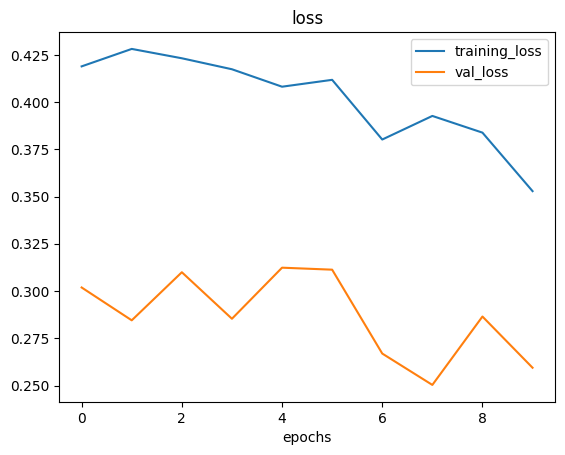

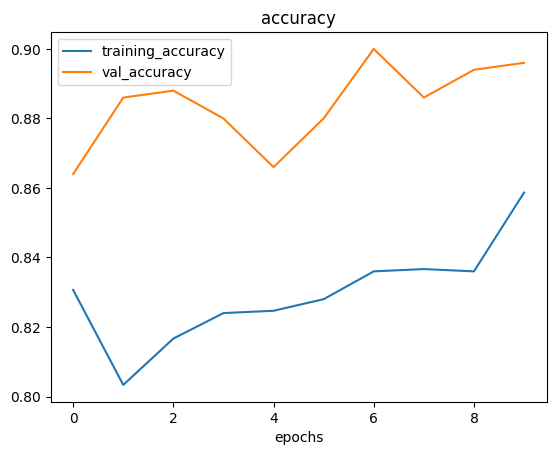

In [ ]:
# Plot loss curves
plot_loss_curves(practice_history_4)

Findings from practice model experiments:

* **practice_model_1** - no changes
 * accuracy: 0.7964 - loss: 0.4426 - val_accuracy: 0.8620 - val_loss: 0.3338
* **practice_model_2** - Increase filters: 2 x Conv2D(filters=32) & 2 x Conv2D(filters=16)
 * accuracy: 0.7821 - loss: 0.4877 - val_accuracy: 0.8620 - val_loss: 0.3380
* **practice_model_3** - Add layers: 2 new Conv2d and one new MaxPool2D
 * accuracy: 0.8132 - loss: 0.4360 - val_accuracy: 0.8480 - val_loss: 0.3515
* **practice_model_4** - Train for longer: increase from 5 to 10 epochs
 * accuracy: 0.8543 - loss: 0.3425 - val_accuracy: 0.8960 - val_loss: 0.2594

Adding layers and training for longer for showed the most improvements, with training the model for longer having the biggest impact.

### Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
steak = mpimg.imread('03-steak.jpeg?raw=true')

--2025-02-16 01:29:29--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/refs/heads/main/images/03-steak.jpeg [following]
--2025-02-16 01:29:29--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/refs/heads/main/images/03-steak.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg [following]
--2025-02-16 01:29:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, 

In [ ]:
# This is another solution I found before continuing with the video and getting Daniel's solution
!curl -L "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true" -o 03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1931k  100 1931k    0     0  1654k      0  0:00:01  0:00:01 --:--:-- 9155k


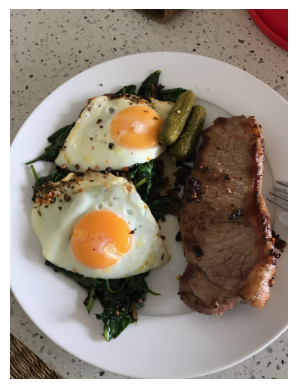

In [ ]:
# View the image
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.9027545]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the iage as well as the model's prediction?

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


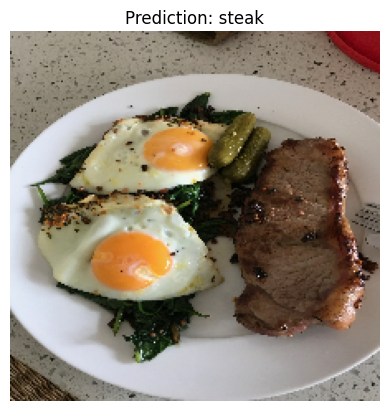

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg')

Our model works! Let's try it on another image... this time pizza 🍕

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true

--2025-02-16 01:58:00--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/refs/heads/main/images/03-pizza-dad.jpeg [following]
--2025-02-16 01:58:00--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/refs/heads/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg [following]
--2025-02-16 01:58:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.13

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


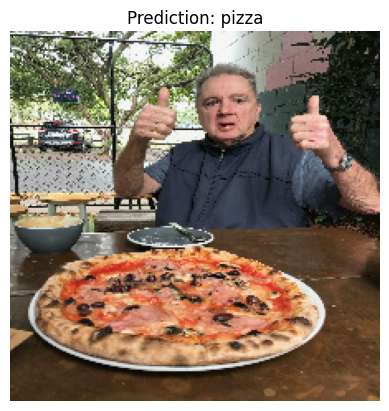

In [ ]:
# View pizza dad image
pred_and_plot(practice_model_4, '03-pizza-dad.jpeg')

**model_7** didn't work but **practice_model_4** did... YEAH BUDDY!

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2025-02-17 19:25:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   109MB/s    in 3.9s    

2025-02-17 19:25:43 (126 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb 17 19:25 .
drwxr-xr-x  1 root root 4096 Feb 17 19:25 ..
drwxr-xr-x 12 root root 4096 Feb 17 19:25 test
drwxr-xr-x 12 root root 4096 Feb 17 19:25 train


In [ ]:
# Set up the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Rewriting the function to visualize a single random image and it's class name
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2939678.jpg']
Image shape: (512, 512, 3)


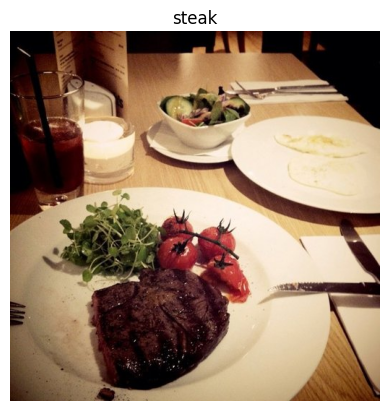

In [ ]:
# Visualize, visualize, visualize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224,),
                                               class_mode='categorical',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# View first batch
images, labels = train_data[0][0], train_data[0][1]
images.shape, labels

((32, 224, 224, 3),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0

### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

When we did multi-class classification in module 02, the loss function we used was `SparseCategoricalCrossentropy`, because the labels were a series of integers from 0 to 9, with each integer representing a specific class (e.g. **[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]**).

However, in this case the labels are one-hot encoded, which means for each image there is a binary value vector where the class is represented by the index where the value is 1, all other values in vector being zero.

So, if a label vector looks like this **[0, 0, 0, 1, 0, 0, 0, 0, 0]**, then the class name of the corresponding image is *'grilled_salmon'* because the index location of the 1 is 3, and the third index of `class_names` is *'grilled_salmon'*.

> `class_names` = ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (similar to previous models but actually the same as the CNN explainer model)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'), # you can add an activation layer after the Conv2D layer if you don't
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2), # default value for pool_size is 2, writing for
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Fit a model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data), # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 142ms/step - accuracy: 0.1567 - loss: 2.2353 - val_accuracy: 0.2432 - val_loss: 2.0486
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.2923 - loss: 1.9807 - val_accuracy: 0.3112 - val_loss: 1.9688
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.4467 - loss: 1.6216 - val_accuracy: 0.3188 - val_loss: 1.9478
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.6297 - loss: 1.1337 - val_accuracy: 0.2944 - val_loss: 2.3659
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.8385 - loss: 0.5489 - val_accuracy: 0.2684 - val_loss: 3.2032


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.2744 - loss: 3.1323


[3.203216314315796, 0.26840001344680786]

In [ ]:
# Rewrite the plot_loss_curves function

# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

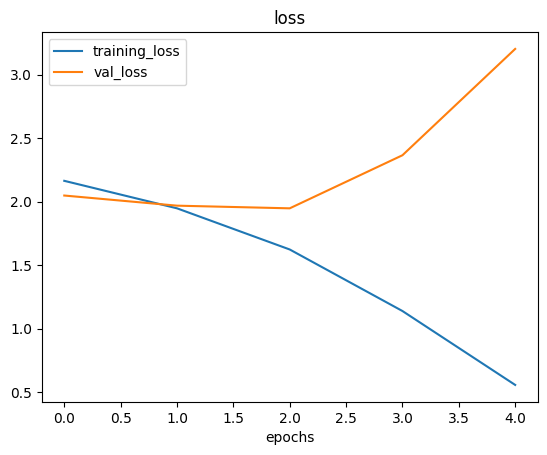

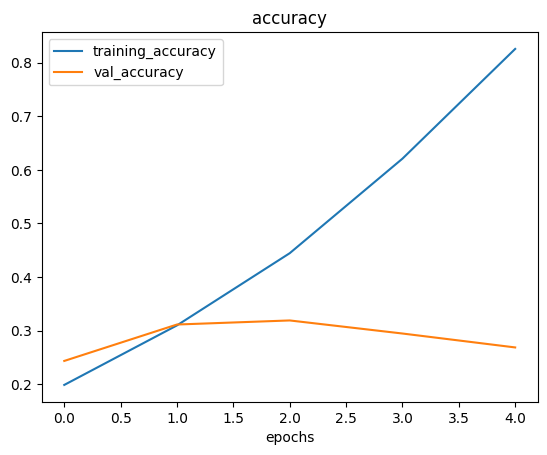

In [ ]:
# Plot the loss curves of multi-class classification model with 10 classes
plot_loss_curves(history_8)

When the training_loss and training_accuracy diverges from the val_loss and val_accuracy curves, that means that the model is **overfitting** because the model is consistently improving on the training data, but it is not able to generalize to the validation data (unseen/ new data).

### 6. Adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunities to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce #  of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without latering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
# How about we try and simplify the model first
# Let's try to remove 2 convolutional layers...

# Create the model
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.1788 - loss: 2.2400 - val_accuracy: 0.2504 - val_loss: 2.0427
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 118ms/step - accuracy: 0.3576 - loss: 1.8711 - val_accuracy: 0.3248 - val_loss: 1.9217
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 113ms/step - accuracy: 0.5422 - loss: 1.4232 - val_accuracy: 0.3224 - val_loss: 1.9923
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.7610 - loss: 0.8091 - val_accuracy: 0.3036 - val_loss: 2.3875
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 108ms/step - accuracy: 0.9066 - loss: 0.3636 - val_accuracy: 0.3100 - val_loss: 2.9030


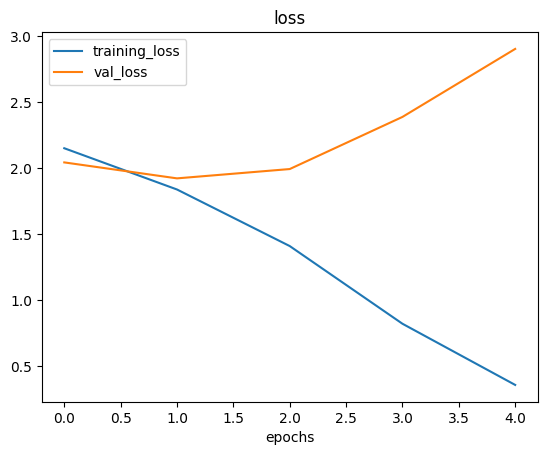

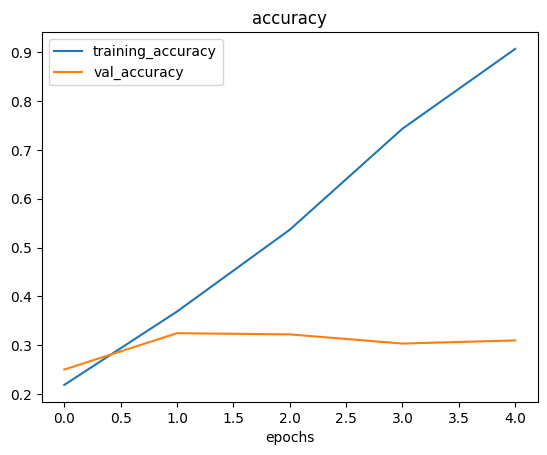

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Reducing the number of convolutional layers doesn't actually help here because convolutional layers are trying to reduce features (think of reducing noise) so the model can better generalize. Unfortunately, we're seeing that our new model with fewer convolutional layers actually is recognizing more patterns and still overfitting.

In [ ]:
model_9.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

In [ ]:
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Tying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.02,
                                             zoom_range=0.02,
                                             width_shift_range=0.02,
                                             height_shift_range=0.02,
                                             horizontal_flip=True)

# Import data and augment it from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   class_mode='categorical',
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'l fit it on the augmented training data of 10 classes

# Create the model by cloning model_8
# Copies structure of model but creates new layers and thus new weights instead of sharing the weights of existing layers
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

It takes longer to fit the augmented data because, as we've seen before, when the data gets loaded in its augmented on the CPU, and then the data gets loaded onto the GPU, hence increasing the amount of time per epoch

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 421ms/step - accuracy: 0.1810 - loss: 2.2072 - val_accuracy: 0.2972 - val_loss: 2.0422
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 136s 402ms/step - accuracy: 0.3036 - loss: 1.9927 - val_accuracy: 0.3236 - val_loss: 1.8881
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 406ms/step - accuracy: 0.3585 - loss: 1.8422 - val_accuracy: 0.3748 - val_loss: 1.8119
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 95s 405ms/step - accuracy: 0.3973 - loss: 1.7481 - val_accuracy: 0.3920 - val_loss: 1.8077
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 400ms/step - accuracy: 0.4360 - loss: 1.6574 - val_accuracy: 0.4040 - val_loss: 1.7662


In [ ]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.2545 - loss: 3.2524 


[3.203216791152954, 0.26840001344680786]

In [ ]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.4147 - loss: 1.7540


[1.76619291305542, 0.40400001406669617]

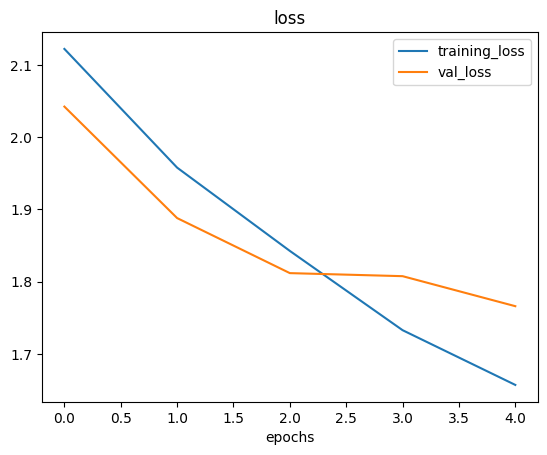

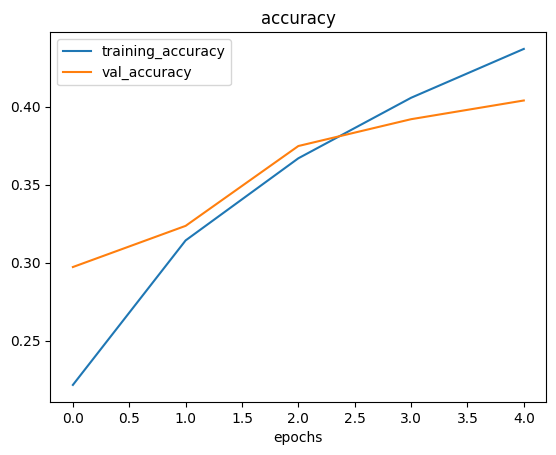

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/ test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is train on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg?raw=true
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg?raw=true

--2025-02-17 00:09:25--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/refs/heads/main/images/03-pizza-dad.jpeg [following]
--2025-02-17 00:09:25--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/refs/heads/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg [following]
--2025-02-17 00:09:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.13

In [ ]:
# Redefine function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


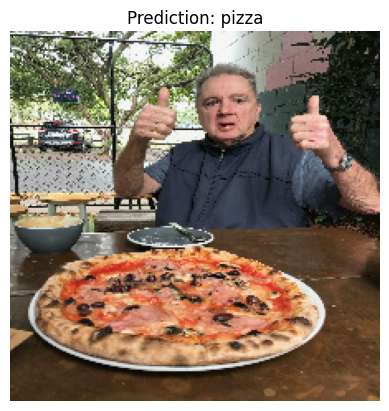

In [ ]:
# Make a prediction using model 10
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg?raw=true',
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


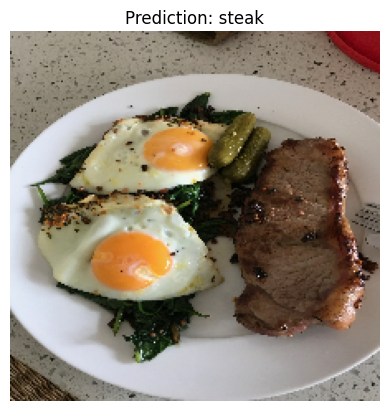

In [ ]:
pred_and_plot(model=model_10,
              filename='03-steak.jpeg?raw=true',
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


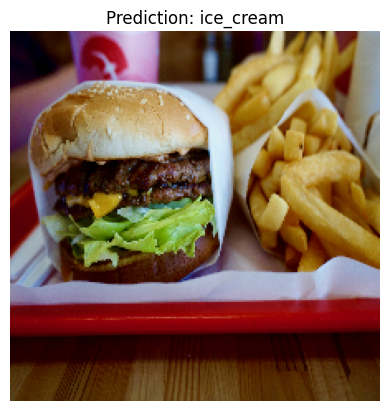

In [ ]:
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg?raw=true',
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


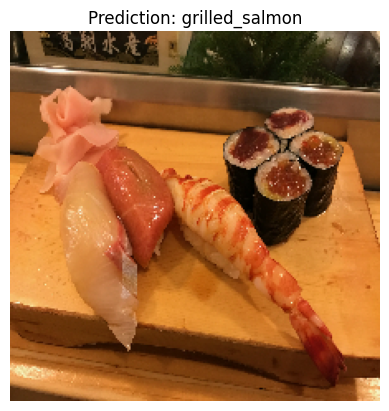

In [ ]:
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg?raw=true',
              class_names=class_names)

#### Good news: our updated pred_and_plot function works for binary classification too...

Looks like our model didn't perform very well on our custom images because it only achieved ~ 40% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10.keras")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.keras")
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.4060 - loss: 1.7576


[1.7661927938461304, 0.40400001406669617]

In [ ]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.3998 - loss: 1.7973


[1.766193151473999, 0.40400001406669617]

In [ ]:
# Practice: save my model to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save model to google drive
model_10.save('/content/drive/MyDrive/tensorflow_with_daniel_bourke/saved_trained_model_10.keras')

In [ ]:
# View where model is saved in google drive
!ls /content/drive/MyDrive/tensorflow_with_daniel_bourke

saved_trained_model_10.keras


## 🛠 Exercises

### 1. What are the key terms? e.g. explain convolution in your own words, pooling in your own words.

**Convolution**: The process of extracting the most significant features or patterns in a dataset, specifically a matrix, in the case of computer vision.
* A convolutional layer will run a convolution window, determined by the kernel size (e.g. `kernel_size=3` means a 3x3 pixel window) that steps over a sub-matrix of 9 pixels, performing a dot product function, and the sum of the product is then passed as the value of the first pixel for the next layer, emphasizing the most significant features or patterns of that group of 9 pixels from that convolutional layer.

**Pooling**: Reduces the "noise" of the image or image matrix, by running a pooling window (similar to convolution window) of the pool size (e.g. `pool_size=2` means a 2x2 pixel window) over the output of the last layer, and reducing the pixel dimensions of the image or matrix by only taking highest value from the 4 pixels in the pooling window and passing that value as the first pixel value for the next layer.

### 2. Explain some hyperparameters of a convolutional layer.

* **Kernel size**: The dimensions of the convolution window. How many features the convolution layer will perform the dot product function on each step.
 > In TensorFlow: `kernel_size=(3, 3)`
* **Stride**: The size of the step of the convolution window. A stride of 1 means the convolution window moves horizontally one pixel each step, and then when it gets all the way to the right, it goes down one pixel goes all the way to the right again.
 * A smaller stride means that more features will be viewed and more patterns extracted.
 > In TensorFlow: `stride=1`

### 4 Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

📖 **Article:** [How to Pick Optimal Learning Rate Using TensorFlow 2.x](https://medium.com/@bijil.subhash/deep-learning-how-to-pick-optimal-learning-rate-using-tensorflow-2-x-af278cadbedb)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create augmented data generator for train data and non-augmented data generator for test data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Import train data from directories and augment it, and import test data from directories
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='categorical',
                                                                   batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [ ]:
# Create a model with lr_scheduler to find ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Recreate the baseline model (same as model_8 & model_10)
model_11 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

# Create the learning callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented), # each epoch take len(train_data_augmented) steps because we want it to go through all the batches
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 435ms/step - accuracy: 0.1091 - loss: 2.3064 - val_accuracy: 0.1332 - val_loss: 2.2864 - learning_rate: 0.0010
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 133s 416ms/step - accuracy: 0.1421 - loss: 2.2767 - val_accuracy: 0.2124 - val_loss: 2.1794 - learning_rate: 0.0011
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 418ms/step - accuracy: 0.2053 - loss: 2.1991 - val_accuracy: 0.2140 - val_loss: 2.1513 - learning_rate: 0.0013
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 416ms/step - accuracy: 0.2118 - loss: 2.1830 - val_accuracy: 0.2592 - val_loss: 2.1156 - learning_rate: 0.0014
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 423ms/step - accuracy: 0.2125 - loss: 2.1759 - val_accuracy: 0.2372 - val_loss: 2.1609 - learning_rate: 0.0016


<Axes: xlabel='epochs'>

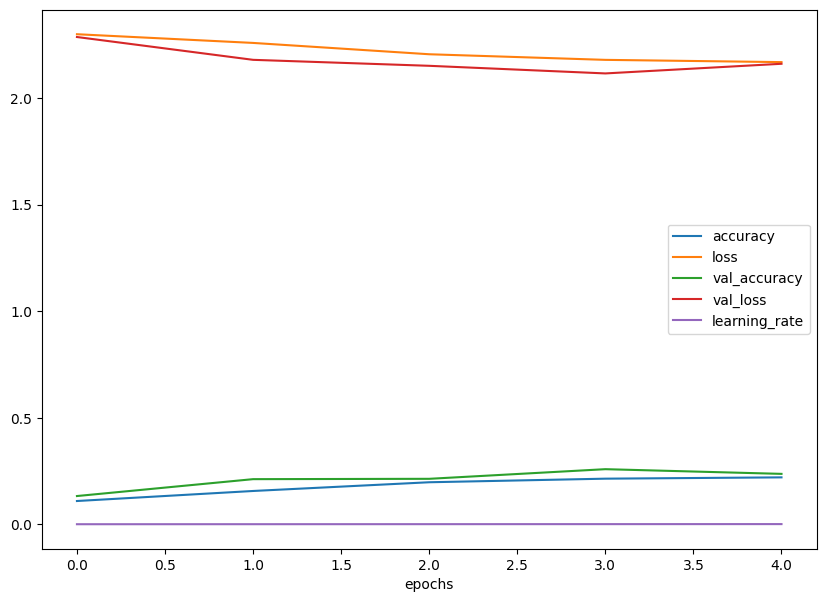

In [ ]:
import pandas as pd

# Plot the accuracy, loss, and learning rate curves
pd.DataFrame(history_11.history).plot(figsize=(10, 7), xlabel='epochs')

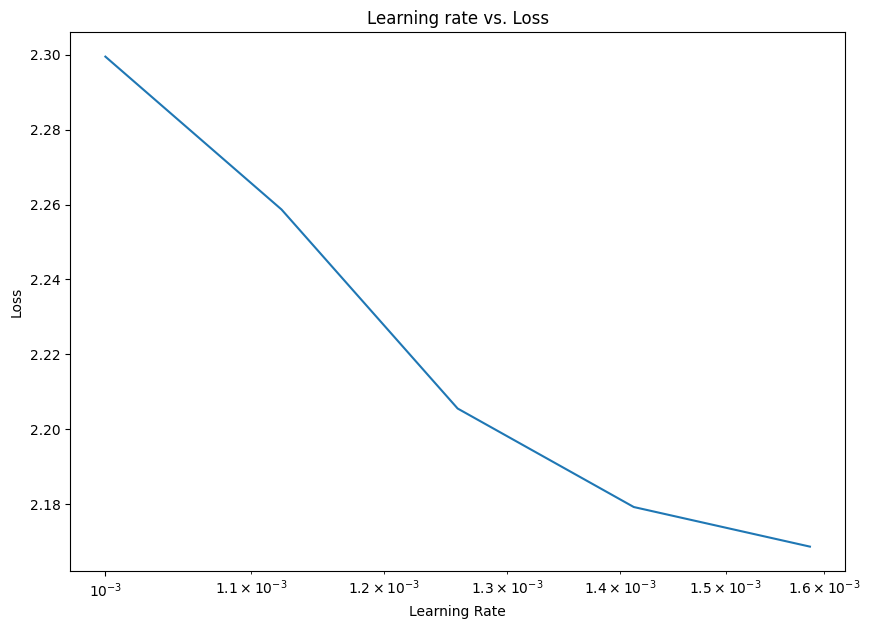

In [ ]:
import matplotlib.pyplot as plt

# Plot the learning rate versus the loss, use 100 as this is the number of epochs we trained the model for
lrs = 1e-3 * (10**(tf.range(5)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_11.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

## Extra-curriculum

### 5. **Code practice**: [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

#### Use Keras preprocessing layers

In [ ]:
# Download the dataset (tf_flowers dataset: https://www.tensorflow.org/datasets/catalog/tf_flowers)
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# The flowers dataset has 5 classes
# Get number of classes
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


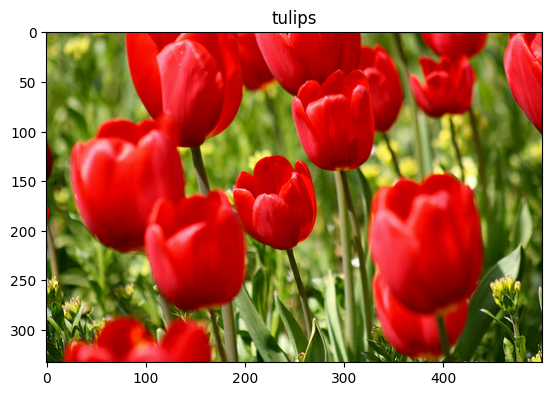

In [ ]:
# Retrieve image from dataset
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
# Resize and rescale the images
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

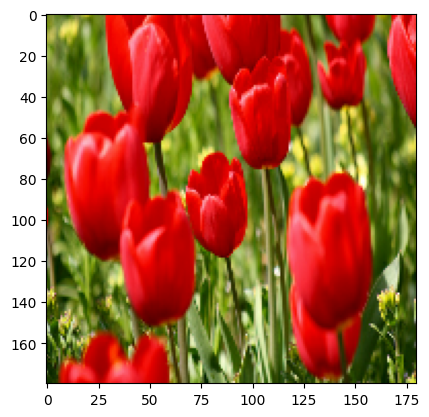

In [ ]:
# Apply resize_and_rescale to an image and view result
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [ ]:
# Verify that the pixels are in the [0, 1] range
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


Data augmentation with Keras preprocessing layers

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
# Add an image to a batch
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

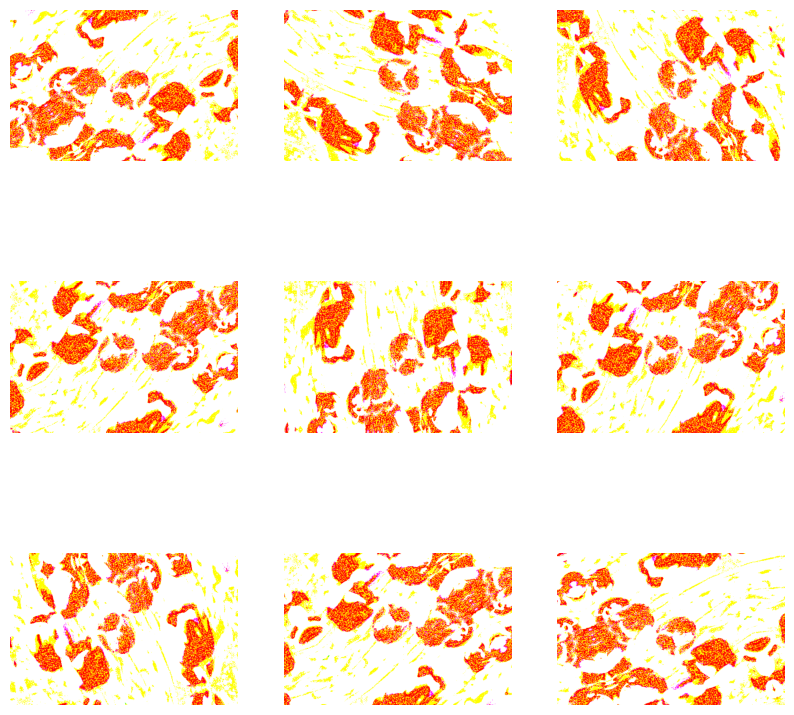

In [ ]:
# View augmented image
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

Two options to use the Keras preprocessing layers

There are two ways you can use these preprocessing layers, with important trade-offs.

Option 1: Make the processing layers part of your model

There are two points to consider when using this method:

1. Data augmentation will run on-device, synchronously with the rest of the layers, and benefit from GPU acceleration.
2. When you save your model, the preprocessing layers will be saved along with the rest of your model. If you deploy the model later it will automatically standardize images so you don't have to reimplement that logic.

In [ ]:
# Create a model with the preprocessing layers in the model
tutorial_model_1 = tf.keras.Sequential([
    # Add the preprocessing layers created above
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D()
    # Rest of your model
])

Option 2: Apply preprocessing layers to your dataset

With this approach, you use `Dataset.map` to create a dataset that yields batches of augmented images.

A couple things to note here:

1. Data augmentation will happen asynchronously on the CPU, and you can overlap the training of your model on the GPU with data preprocessing, using `Dataset.prefetch`.
2. The preprocessing layers will not automatically be saved with your model, instead you need to attach them to your model post-training.

In [ ]:
# Create an augmented dataset (not sure this is an extra explanator step in the tutorial)
aug_ds = train_ds.map(
    lambda x, y: (resize_and_rescale(x, training=True), y)
)

In [ ]:
# Apply preprocessing layers to the datasets
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

#### Using tf.image

For finer control, you can write your own data augmentation pipelines or layers using `tf.data` and `tf.image`.

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

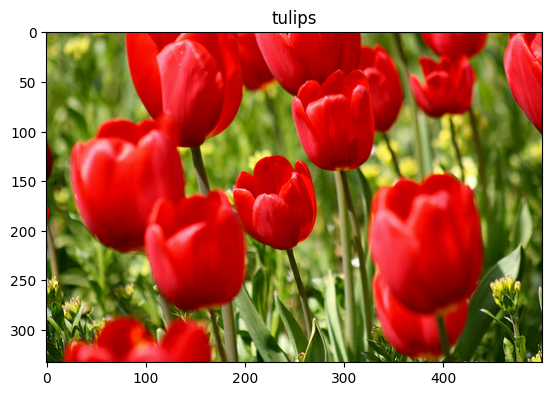

In [ ]:
# Retrieve an image to work with
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [ ]:
# Write a function to visualize and compare the original and augmented images side-by-side
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1, 2, 1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1, 2, 2)
  plt.title('Augmented image')
  plt.imshow(augmented)

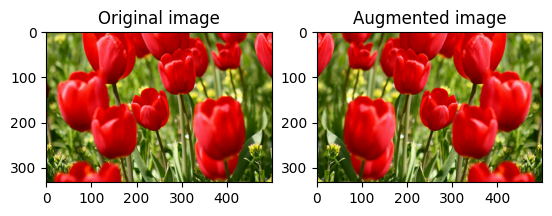

In [ ]:
# Flip an image
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

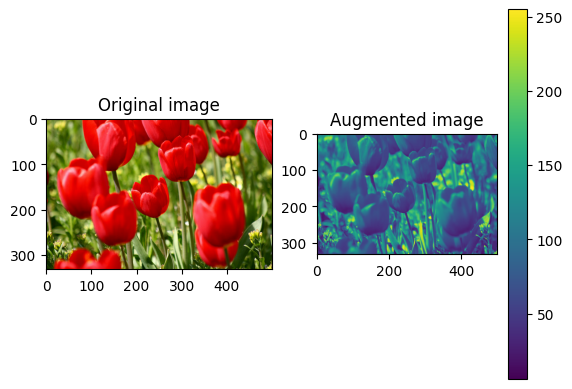

In [ ]:
# Grayscale an image
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

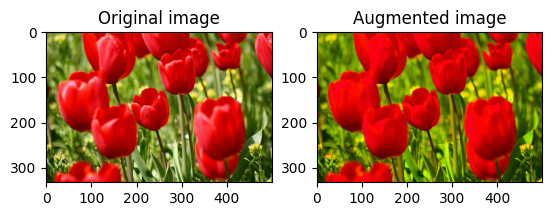

In [ ]:
# Saturate an image
saturated = tf.image.adjust_saturation(image, 100)
visualize(image, saturated)

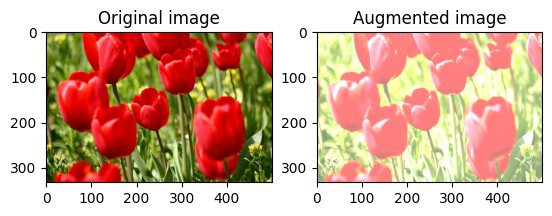

In [ ]:
# Adjust brightness of an image
bright = tf.image.adjust_brightness(image, 0.5)
visualize(image, bright)

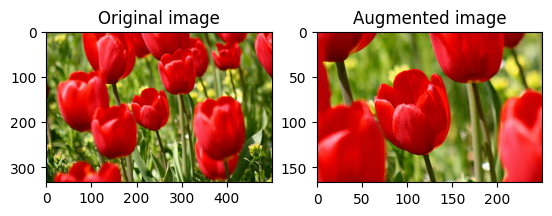

In [ ]:
# Crop an image
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

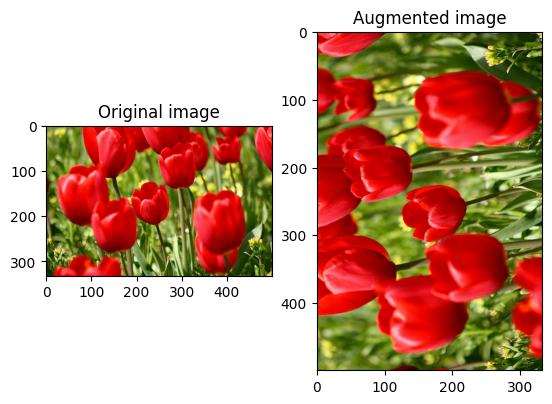

In [ ]:
# Rotate an image
rotated = tf.image.rot90(image)
visualize(image, rotated)

Random transformations

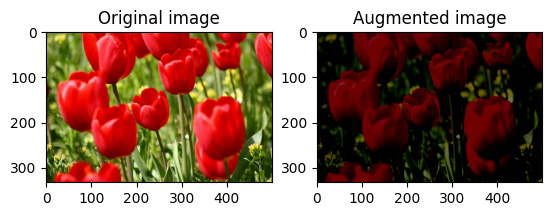

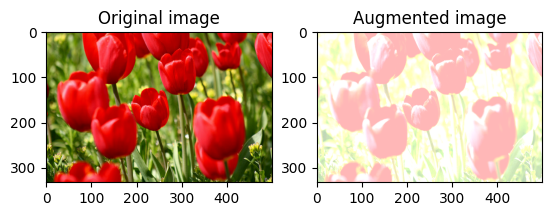

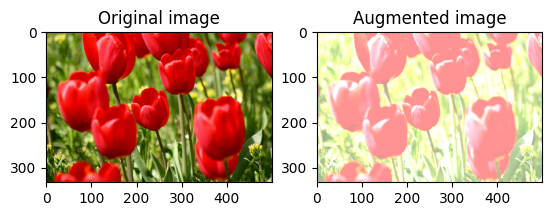

In [ ]:
# Randomly change brightness
for i in range(3):
  seed = (i, 0)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed
  )

  visualize(image, stateless_random_brightness)

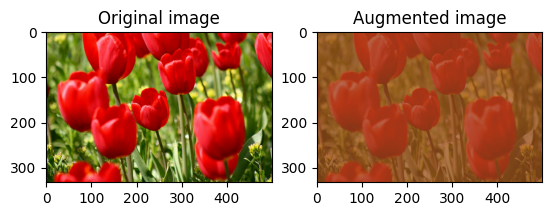

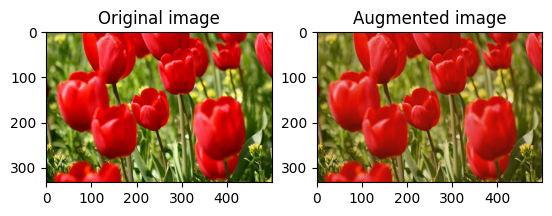

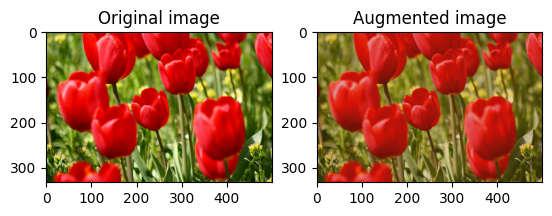

In [ ]:
# Randomly change image contrast
for i in range(3):
  seed = (i, 0)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image, lower=0.1, upper=0.9, seed=seed
  )

  visualize(image, stateless_random_contrast)

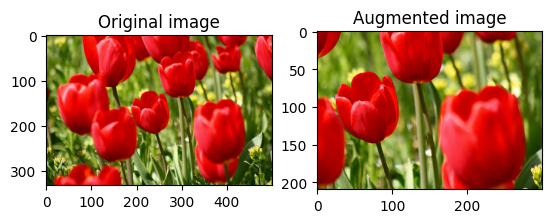

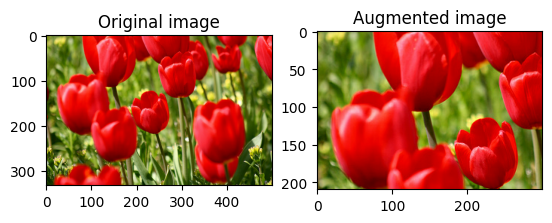

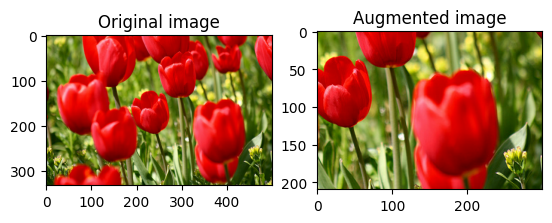

In [ ]:
# Randomly crop an image
for i in range(3):
  seed = (i, 0)
  stateless_random_crop = tf.image.stateless_random_crop(
      image, size=[210, 300, 3], seed=seed
  )

  visualize(image, stateless_random_crop)